#  	Collecting data from the Web using APIs

This notebook is copyrighted and made available under the [Apache License v2.0](https://creativecommons.org/licenses/by-sa/4.0/) license.

# Web Data Acq.. what?

### 1. "Webscraping"
more like "Screenscraping"

### 2. API-"Scraping"

What is a Web API?

* answers if spoken to correctly
* predefined set of vocabulary, rules and answer formats
* mostly accessible over http and often without credentials

**Also**:
Install a browser add-on like [Chrome: JSON Viewer](https://chrome.google.com/webstore/detail/json-viewer/gbmdgpbipfallnflgajpaliibnhdgobh) or [Firefox: JSON view](https://jsonview.com) (similarly available for other browsers), to see human-readable JSON.

## Import modules and set up environment

In [ ]:
! pip install requests

In [3]:
# Two fundamental packages for doing data manipulation
import numpy as np                   # http://www.numpy.org/
import pandas as pd                  # http://pandas.pydata.org/

# Package to save/load Python structures in the "Pickle" format
import pickle

# Last but not least: Package query and download from web resources! Alternatives: URLlib2, URLlib3
import requests

# Querying Abgeordnetenwatch.de
https://en.wikipedia.org/wiki/Parliamentwatch

https://www.abgeordnetenwatch.de/api/

https://www.abgeordnetenwatch.de/api/v2/parliaments

https://www.abgeordnetenwatch.de/api/v2/politicians


Task: Find out how many votes the politicans in the current NRW parliament have participated in.



There are several ways to send a request to an API, among others you can do it with the package `requests`. This package allows you to make **HTTP requests** very **easily** and **quickly**. It provides all functions and methods to write your **parameters** into requests, send you **requests** and work with your **responses**.

## Getting candidates of a parliament

In [2]:
# ! pip install requests

In [4]:
parliaments = requests.get(url="https://www.abgeordnetenwatch.de/api/v2/parliaments").json()

In [5]:
parliaments

{'meta': {'abgeordnetenwatch_api': {'version': '2.7',
   'changelog': 'https://www.abgeordnetenwatch.de/api/version-changelog/aktuell',
   'licence': 'CC0 1.0',
   'licence_link': 'https://creativecommons.org/publicdomain/zero/1.0/deed.de',
   'documentation': 'https://www.abgeordnetenwatch.de/api/entitaeten/parliament'},
  'status': 'ok',
  'status_message': '',
  'result': {'count': 18, 'total': 18, 'range_start': 0, 'range_end': 100}},
 'data': [{'id': 18,
   'entity_type': 'parliament',
   'label': 'Schleswig-Holstein',
   'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliaments/18',
   'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/schleswig-holstein',
   'label_external_long': 'Landtag Schleswig-Holstein',
   'current_project': {'id': 138,
    'entity_type': 'parliament_period',
    'label': 'Schleswig-Holstein 2022 - 2027',
    'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliament-periods/138',
    'abgeordnetenwatch_url': 'https://www.abgeordnetenwat

In [6]:
 # For better handling
import json
print(json.dumps(parliaments, indent=4))

{
    "meta": {
        "abgeordnetenwatch_api": {
            "version": "2.7",
            "changelog": "https://www.abgeordnetenwatch.de/api/version-changelog/aktuell",
            "licence": "CC0 1.0",
            "licence_link": "https://creativecommons.org/publicdomain/zero/1.0/deed.de",
            "documentation": "https://www.abgeordnetenwatch.de/api/entitaeten/parliament"
        },
        "status": "ok",
        "status_message": "",
        "result": {
            "count": 18,
            "total": 18,
            "range_start": 0,
            "range_end": 100
        }
    },
    "data": [
        {
            "id": 18,
            "entity_type": "parliament",
            "label": "Schleswig-Holstein",
            "api_url": "https://www.abgeordnetenwatch.de/api/v2/parliaments/18",
            "abgeordnetenwatch_url": "https://www.abgeordnetenwatch.de/schleswig-holstein",
            "label_external_long": "Landtag Schleswig-Holstein",
            "current_project": {
   

Let's inspect the stuff inside our results.

In [6]:
parliaments.keys()

dict_keys(['meta', 'data'])

In [7]:
parliaments['meta']

{'abgeordnetenwatch_api': {'version': '2.7',
  'changelog': 'https://www.abgeordnetenwatch.de/api/version-changelog/aktuell',
  'licence': 'CC0 1.0',
  'licence_link': 'https://creativecommons.org/publicdomain/zero/1.0/deed.de',
  'documentation': 'https://www.abgeordnetenwatch.de/api/entitaeten/parliament'},
 'status': 'ok',
 'status_message': '',
 'result': {'count': 18, 'total': 18, 'range_start': 0, 'range_end': 100}}

In [8]:
parliaments['data']

[{'id': 18,
  'entity_type': 'parliament',
  'label': 'Schleswig-Holstein',
  'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliaments/18',
  'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/schleswig-holstein',
  'label_external_long': 'Landtag Schleswig-Holstein',
  'current_project': {'id': 138,
   'entity_type': 'parliament_period',
   'label': 'Schleswig-Holstein 2022 - 2027',
   'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliament-periods/138',
   'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/schleswig-holstein'}},
 {'id': 17,
  'entity_type': 'parliament',
  'label': 'Sachsen',
  'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliaments/17',
  'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/sachsen',
  'label_external_long': 'Landtag Sachsen',
  'current_project': {'id': 119,
   'entity_type': 'parliament_period',
   'label': 'Sachsen 2019 - 2024',
   'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliament-periods/1

Save your results!

In [9]:
with open('21_parliaments.p', 'wb') as f:
    pickle.dump(parliaments, f)

In [10]:
with open('21_parliaments.p', 'rb') as f:
    parliaments = pickle.load(f)

We can check for specific conditions, e.g., particular states' information.

In [11]:
for i in parliaments['data']:
    if i['label'] == 'Nordrhein-Westfalen':
        print(i['api_url'])

https://www.abgeordnetenwatch.de/api/v2/parliaments/4


In [12]:
for i in parliaments['data']:
    if i['label'] == 'Nordrhein-Westfalen':
        print(i['current_project']['api_url'])

https://www.abgeordnetenwatch.de/api/v2/parliament-periods/139


Now, let's get some data about politicians

https://www.abgeordnetenwatch.de/api/v2/politicians  !

In [13]:
requests.get(url="https://www.abgeordnetenwatch.de/api/v2/politicians").json()

{'meta': {'abgeordnetenwatch_api': {'version': '2.7',
   'changelog': 'https://www.abgeordnetenwatch.de/api/version-changelog/aktuell',
   'licence': 'CC0 1.0',
   'licence_link': 'https://creativecommons.org/publicdomain/zero/1.0/deed.de',
   'documentation': 'https://www.abgeordnetenwatch.de/api/entitaeten/politician'},
  'status': 'ok',
  'status_message': '',
  'result': {'count': 100,
   'total': 32088,
   'range_start': 0,
   'range_end': 100}},
 'data': [{'id': 180762,
   'entity_type': 'politician',
   'label': 'Angela Hohmann',
   'api_url': 'https://www.abgeordnetenwatch.de/api/v2/politicians/180762',
   'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/profile/angela-hohmann',
   'first_name': 'Angela',
   'last_name': 'Hohmann',
   'birth_name': None,
   'sex': 'f',
   'year_of_birth': 1963,
   'party': {'id': 1,
    'entity_type': 'party',
    'label': 'SPD',
    'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parties/1'},
   'party_past': None,
   'education'

Ok, then next: https://www.abgeordnetenwatch.de/api/v2/candidacies-mandates

In [7]:
nrw = requests.get(url='https://www.abgeordnetenwatch.de/api/v2/candidacies-mandates?parliament_period=139&range_end=500').json()

In [9]:
for mand in nrw['data']:
    if "stefan" in mand['label'].lower():
        print(mand)
        print()

{'id': 58436, 'entity_type': 'candidacy_mandate', 'label': 'Stefan Kämmerling (Nordrhein-Westfalen 2022 - 2027)', 'api_url': 'https://www.abgeordnetenwatch.de/api/v2/candidacies-mandates/58436', 'id_external_administration': None, 'id_external_administration_description': None, 'type': 'mandate', 'parliament_period': {'id': 139, 'entity_type': 'parliament_period', 'label': 'Nordrhein-Westfalen 2022 - 2027', 'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliament-periods/139', 'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/nordrhein-westfalen'}, 'politician': {'id': 130706, 'entity_type': 'politician', 'label': 'Stefan Kämmerling', 'api_url': 'https://www.abgeordnetenwatch.de/api/v2/politicians/130706', 'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/profile/stefan-kaemmerling'}, 'start_date': '2023-03-04', 'end_date': None, 'info': 'Nachgerückt für Ibrahim Yetim', 'electoral_data': {'id': 59360, 'entity_type': 'electoral_data', 'label': 'Stefan Kämmerling 

A DataFrame would be more convenient

In [10]:
df = pd.DataFrame(nrw['data'])
df

,id,entity_type,label,api_url,id_external_administration,id_external_administration_description,type,parliament_period,politician,start_date,end_date,info,electoral_data,fraction_membership
0,60636,candidacy_mandate,Sandy Meinhardt (Nordrhein-Westfalen 2022 - 2027),https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 178407, 'entity_type': 'politician', 'l...",2024-02-09,None,Sandy Meinhardt ist am 09.02.2024 für Nadja Bü...,"{'id': 61560, 'entity_type': 'electoral_data',...","[{'id': 11555, 'entity_type': 'fraction_member..."
1,58436,candidacy_mandate,Stefan Kämmerling (Nordrhein-Westfalen 2022 - ...,https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 130706, 'entity_type': 'politician', 'l...",2023-03-04,None,Nachgerückt für Ibrahim Yetim,"{'id': 59360, 'entity_type': 'electoral_data',...","[{'id': 10871, 'entity_type': 'fraction_member..."
2,58123,candidacy_mandate,Franziska Müller-Rech (Nordrhein-Westfalen 202...,https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 130233, 'entity_type': 'politician', 'l...",2023-01-27,None,None,"{'id': 59047, 'entity_type': 'electoral_data',...","[{'id': 10824, 'entity_type': 'fraction_member..."
3,57249,candidacy_mandate,Susanne Schneider (Nordrhein-Westfalen 2022 - ...,https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 130718, 'entity_type': 'politician', 'l...",2023-01-01,None,None,"{'id': 58173, 'entity_type': 'electoral_data',...","[{'id': 10817, 'entity_type': 'fraction_member..."
4,57037,candidacy_mandate,Ina Scharrenbach (Nordrhein-Westfalen 2022 - 2...,https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 130328, 'entity_type': 'politician', 'l...",2022-06-30,None,Nachgerückt für Daniel Sieveke,"{'id': 57961, 'entity_type': 'electoral_data',...","[{'id': 10647, 'entity_type': 'fraction_member..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,56205,candidacy_mandate,Romina Plonsker (Nordrhein-Westfalen 2022 - 2027),https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 130363, 'entity_type': 'politician', 'l...",None,None,None,"{'id': 57129, 'entity_type': 'electoral_data',...","[{'id': 10435, 'entity_type': 'fraction_member..."
191,56204,candidacy_mandate,Daniel Scheen-Pauls (Nordrhein-Westfalen 2022 ...,https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 178595, 'entity_type': 'politician', 'l...",None,None,None,"{'id': 57128, 'entity_type': 'electoral_data',...","[{'id': 10434, 'entity_type': 'fraction_member..."
192,56203,candidacy_mandate,Hendrik Schmitz (Nordrhein-Westfalen 2022 - 2027),https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 130297, 'entity_type': 'politician', 'l...",None,None,None,"{'id': 57127, 'entity_type': 'electoral_data',...","[{'id': 10433, 'entity_type': 'fraction_member..."
193,56202,candidacy_mandate,Annika Fohn (Nordrhein-Westfalen 2022 - 2027),https://www.abgeordnetenwatch.de/api/v2/candid...,None,None,mandate,"{'id': 139, 'entity_type': 'parliament_period'...","{'id': 178594, 'entity_type': 'politician', 'l...",None,None,None,"{'id': 57126, 'entity_type': 'electoral_data',...","[{'id': 10432, 'entity_type': 'fraction_member..."


In [11]:
nrw['data'][0:10]

[{'id': 60636,
  'entity_type': 'candidacy_mandate',
  'label': 'Sandy Meinhardt (Nordrhein-Westfalen 2022 - 2027)',
  'api_url': 'https://www.abgeordnetenwatch.de/api/v2/candidacies-mandates/60636',
  'id_external_administration': None,
  'id_external_administration_description': None,
  'type': 'mandate',
  'parliament_period': {'id': 139,
   'entity_type': 'parliament_period',
   'label': 'Nordrhein-Westfalen 2022 - 2027',
   'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliament-periods/139',
   'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/nordrhein-westfalen'},
  'politician': {'id': 178407,
   'entity_type': 'politician',
   'label': 'Sandy Meinhardt',
   'api_url': 'https://www.abgeordnetenwatch.de/api/v2/politicians/178407',
   'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/profile/sandy-meinhardt'},
  'start_date': '2024-02-09',
  'end_date': None,
  'info': 'Sandy Meinhardt ist am 09.02.2024 für Nadja Büteführ in den Landtag von Nordrhein-Wes

In [12]:
nrw_for_df = []

for mand in nrw['data']:
    print(mand['label'])
    mand_dict = {}
    mand_dict['id']=mand['id']
    mand_dict['label']=mand['label']
    mand_dict['pol_full_name']=mand['politician']['label']
    mand_dict['pol_url']=mand['politician']['api_url']
    mand_dict['start_date']=mand['start_date']
    try:
        mand_dict['constituency_label']=mand['electoral_data']['constituency']['label']
    except:
        print(mand['electoral_data'])
    nrw_for_df.append(mand_dict)

Sandy Meinhardt (Nordrhein-Westfalen 2022 - 2027)
Stefan Kämmerling (Nordrhein-Westfalen 2022 - 2027)
Franziska Müller-Rech (Nordrhein-Westfalen 2022 - 2027)
Susanne Schneider (Nordrhein-Westfalen 2022 - 2027)
Ina Scharrenbach (Nordrhein-Westfalen 2022 - 2027)
Andreas Keith-Volkmer (Nordrhein-Westfalen 2022 - 2027)
Frederick Cordes (Nordrhein-Westfalen 2022 - 2027)
{'id': 57318, 'entity_type': 'electoral_data', 'label': 'Frederick Cordes (Nordrhein-Westfalen 2022 - 2027)', 'electoral_list': {'id': 506, 'entity_type': 'electoral_list', 'label': 'Landesliste SPD (Nordrhein-Westfalen 2022 - 2027)', 'api_url': 'https://www.abgeordnetenwatch.de/api/v2/electoral-lists/506'}, 'list_position': 13, 'constituency': None, 'constituency_result': None, 'constituency_result_count': None, 'mandate_won': 'list'}
Gregor Kaiser (Nordrhein-Westfalen 2022 - 2027)
Christin-Marie Stamm (Nordrhein-Westfalen 2022 - 2027)
Angela Freimuth (Nordrhein-Westfalen 2022 - 2027)
Gordan Dudas (Nordrhein-Westfalen 2022 

In [13]:
nrw_for_df = []

for mand in nrw['data']:
    print(mand['label'])
    mand_dict = {}
    mand_dict['id']=mand['id']
    mand_dict['label']=mand['label']
    mand_dict['pol_full_name']=mand['politician']['label']
    mand_dict['pol_url']=mand['politician']['api_url']
    mand_dict['start_date']=mand['start_date']
    try: mand_dict['constituency_label']=mand['electoral_data']['constituency']['label']
    except: mand_dict['constituency_label']= None
    nrw_for_df.append(mand_dict)

Sandy Meinhardt (Nordrhein-Westfalen 2022 - 2027)
Stefan Kämmerling (Nordrhein-Westfalen 2022 - 2027)
Franziska Müller-Rech (Nordrhein-Westfalen 2022 - 2027)
Susanne Schneider (Nordrhein-Westfalen 2022 - 2027)
Ina Scharrenbach (Nordrhein-Westfalen 2022 - 2027)
Andreas Keith-Volkmer (Nordrhein-Westfalen 2022 - 2027)
Frederick Cordes (Nordrhein-Westfalen 2022 - 2027)
Gregor Kaiser (Nordrhein-Westfalen 2022 - 2027)
Christin-Marie Stamm (Nordrhein-Westfalen 2022 - 2027)
Angela Freimuth (Nordrhein-Westfalen 2022 - 2027)
Gordan Dudas (Nordrhein-Westfalen 2022 - 2027)
Inge Blask (Nordrhein-Westfalen 2022 - 2027)
Dagmar Hanses (Nordrhein-Westfalen 2022 - 2027)
Christof Rasche (Nordrhein-Westfalen 2022 - 2027)
Michael Röls-Leitmann (Nordrhein-Westfalen 2022 - 2027)
Christian Loose (Nordrhein-Westfalen 2022 - 2027)
Verena Schäffer (Nordrhein-Westfalen 2022 - 2027)
Marc Lürbke (Nordrhein-Westfalen 2022 - 2027)
Norika Creuzmann (Nordrhein-Westfalen 2022 - 2027)
Julia Eisentraut (Nordrhein-Westfale

In [21]:
nrw_for_df

[{'id': 60636,
  'label': 'Sandy Meinhardt (Nordrhein-Westfalen 2022 - 2027)',
  'pol_full_name': 'Sandy Meinhardt',
  'pol_url': 'https://www.abgeordnetenwatch.de/api/v2/politicians/178407',
  'start_date': '2024-02-09',
  'constituency_label': '71 - Recklinghausen III (Nordrhein-Westfalen 2022 - 2027)'},
 {'id': 58436,
  'label': 'Stefan Kämmerling (Nordrhein-Westfalen 2022 - 2027)',
  'pol_full_name': 'Stefan Kämmerling',
  'pol_url': 'https://www.abgeordnetenwatch.de/api/v2/politicians/130706',
  'start_date': '2023-03-04',
  'constituency_label': '4 - Aachen IV (Nordrhein-Westfalen 2022 - 2027)'},
 {'id': 58123,
  'label': 'Franziska Müller-Rech (Nordrhein-Westfalen 2022 - 2027)',
  'pol_full_name': 'Franziska Müller-Rech',
  'pol_url': 'https://www.abgeordnetenwatch.de/api/v2/politicians/130233',
  'start_date': '2023-01-27',
  'constituency_label': '30 - Bonn I (Nordrhein-Westfalen 2022 - 2027)'},
 {'id': 57249,
  'label': 'Susanne Schneider (Nordrhein-Westfalen 2022 - 2027)',
 

In [14]:
nrw_df = pd.DataFrame(nrw_for_df)
nrw_df

,id,label,pol_full_name,pol_url,start_date,constituency_label
0,60636,Sandy Meinhardt (Nordrhein-Westfalen 2022 - 2027),Sandy Meinhardt,https://www.abgeordnetenwatch.de/api/v2/politi...,2024-02-09,71 - Recklinghausen III (Nordrhein-Westfalen 2...
1,58436,Stefan Kämmerling (Nordrhein-Westfalen 2022 - ...,Stefan Kämmerling,https://www.abgeordnetenwatch.de/api/v2/politi...,2023-03-04,4 - Aachen IV (Nordrhein-Westfalen 2022 - 2027)
2,58123,Franziska Müller-Rech (Nordrhein-Westfalen 202...,Franziska Müller-Rech,https://www.abgeordnetenwatch.de/api/v2/politi...,2023-01-27,30 - Bonn I (Nordrhein-Westfalen 2022 - 2027)
3,57249,Susanne Schneider (Nordrhein-Westfalen 2022 - ...,Susanne Schneider,https://www.abgeordnetenwatch.de/api/v2/politi...,2023-01-01,115 - Unna I (Nordrhein-Westfalen 2022 - 2027)
4,57037,Ina Scharrenbach (Nordrhein-Westfalen 2022 - 2...,Ina Scharrenbach,https://www.abgeordnetenwatch.de/api/v2/politi...,2022-06-30,116 - Unna II (Nordrhein-Westfalen 2022 - 2027)
...,...,...,...,...,...,...
190,56205,Romina Plonsker (Nordrhein-Westfalen 2022 - 2027),Romina Plonsker,https://www.abgeordnetenwatch.de/api/v2/politi...,None,5 - Rhein-Erft-Kreis I (Nordrhein-Westfalen 20...
191,56204,Daniel Scheen-Pauls (Nordrhein-Westfalen 2022 ...,Daniel Scheen-Pauls,https://www.abgeordnetenwatch.de/api/v2/politi...,None,4 - Aachen IV (Nordrhein-Westfalen 2022 - 2027)
192,56203,Hendrik Schmitz (Nordrhein-Westfalen 2022 - 2027),Hendrik Schmitz,https://www.abgeordnetenwatch.de/api/v2/politi...,None,3 - Aachen III (Nordrhein-Westfalen 2022 - 2027)
193,56202,Annika Fohn (Nordrhein-Westfalen 2022 - 2027),Annika Fohn,https://www.abgeordnetenwatch.de/api/v2/politi...,None,2 - Aachen II (Nordrhein-Westfalen 2022 - 2027)


In [23]:
nrw_df[nrw_df.pol_full_name.str.contains('Martin Vincentz')]

,id,label,pol_full_name,pol_url,start_date,constituency_label
45,56355,Martin Vincentz (Nordrhein-Westfalen 2022 - 2027),Martin Vincentz,https://www.abgeordnetenwatch.de/api/v2/politi...,None,48 - Krefeld I - Viersen III (Nordrhein-Westfa...


In [15]:
len(nrw_df)

195

In [16]:
nrw_df[-20:]

,id,label,pol_full_name,pol_url,start_date,constituency_label
175,56220,Rüdiger Scholz (Nordrhein-Westfalen 2022 - 2027),Rüdiger Scholz,https://www.abgeordnetenwatch.de/api/v2/politi...,None,20 - Leverkusen (Nordrhein-Westfalen 2022 - 2027)
176,56219,Carolin Kirsch (Nordrhein-Westfalen 2022 - 2027),Carolin Kirsch,https://www.abgeordnetenwatch.de/api/v2/politi...,None,19 - Köln VII (Nordrhein-Westfalen 2022 - 2027)
177,56218,Berivan Aymaz (Nordrhein-Westfalen 2022 - 2027),Berivan Aymaz,https://www.abgeordnetenwatch.de/api/v2/politi...,None,18 - Köln VI (Nordrhein-Westfalen 2022 - 2027)
178,56217,Florian Braun (Nordrhein-Westfalen 2022 - 2027),Florian Braun,https://www.abgeordnetenwatch.de/api/v2/politi...,None,17 - Köln V (Nordrhein-Westfalen 2022 - 2027)
179,56216,Lena Teschlade (Nordrhein-Westfalen 2022 - 2027),Lena Teschlade,https://www.abgeordnetenwatch.de/api/v2/politi...,None,16 - Köln IV (Nordrhein-Westfalen 2022 - 2027)
180,56215,Arndt Klocke (Nordrhein-Westfalen 2022 - 2027),Arndt Klocke,https://www.abgeordnetenwatch.de/api/v2/politi...,None,15 - Köln III (Nordrhein-Westfalen 2022 - 2027)
181,56214,Frank Jablonski (Nordrhein-Westfalen 2022 - 2027),Frank Jablonski,https://www.abgeordnetenwatch.de/api/v2/politi...,None,14 - Köln II (Nordrhein-Westfalen 2022 - 2027)
182,56213,Eileen Woestmann (Nordrhein-Westfalen 2022 - 2...,Eileen Woestmann,https://www.abgeordnetenwatch.de/api/v2/politi...,None,13 - Köln I (Nordrhein-Westfalen 2022 - 2027)
183,56212,Ralf Nolten (Nordrhein-Westfalen 2022 - 2027),Ralf Nolten,https://www.abgeordnetenwatch.de/api/v2/politi...,None,12 - Düren II - Euskirchen II (Nordrhein-Westf...
184,56211,Patricia Peill (Nordrhein-Westfalen 2022 - 2027),Patricia Peill,https://www.abgeordnetenwatch.de/api/v2/politi...,None,11 - Düren I (Nordrhein-Westfalen 2022 - 2027)


In [17]:
nrw_df.constituency_label.value_counts()

71 - Recklinghausen III (Nordrhein-Westfalen 2022 - 2027)         3
16 - Köln IV (Nordrhein-Westfalen 2022 - 2027)                    3
68 - Essen IV (Nordrhein-Westfalen 2022 - 2027)                   3
74 - Gelsenkirchen II (Nordrhein-Westfalen 2022 - 2027)           3
48 - Krefeld I - Viersen III (Nordrhein-Westfalen 2022 - 2027)    3
                                                                 ..
98 - Lippe II - Herford III (Nordrhein-Westfalen 2022 - 2027)     1
99 - Lippe III (Nordrhein-Westfalen 2022 - 2027)                  1
102 - Höxter (Nordrhein-Westfalen 2022 - 2027)                    1
103 - Hagen I (Nordrhein-Westfalen 2022 - 2027)                   1
1 - Aachen I (Nordrhein-Westfalen 2022 - 2027)                    1
Name: constituency_label, Length: 127, dtype: int64

## Let's say I want to...

1. Find and get the list of all candidates in the Election ('Wahl') for the parliament of Bremen in 2015.
2. Transform the result into a Data Frame, keeping only the 3 most useful variables as columns (as you seem fit), plus mandate_won.
3. From that DF, list only the candidates that won something, no matter what.

https://www.abgeordnetenwatch.de/api/v2/parliaments

https://www.abgeordnetenwatch.de/api/v2/parliament-periods?parliament=10&range_end=500 --> get id for Bremen 2015 Wahl = 43

https://www.abgeordnetenwatch.de/api/v2/candidacies-mandates?parliament_period=43&range_end=500

Find and get the list of all candidates in the Election ('Wahl') for the parliament of Bremen in 2015.

In [18]:
bremen_cands = requests.get(url='https://www.abgeordnetenwatch.de/api/v2/candidacies-mandates?parliament_period=43&range_end=500').json()
bremen_cands['data'][0]

{'id': 36764,
 'entity_type': 'candidacy_mandate',
 'label': 'Eyfer Tunc (Bremen Wahl 2015)',
 'api_url': 'https://www.abgeordnetenwatch.de/api/v2/candidacies-mandates/36764',
 'id_external_administration': None,
 'id_external_administration_description': None,
 'type': 'candidacy',
 'parliament_period': {'id': 43,
  'entity_type': 'parliament_period',
  'label': 'Bremen Wahl 2015',
  'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parliament-periods/43',
  'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/bremen/wahl-2015'},
 'politician': {'id': 73863,
  'entity_type': 'politician',
  'label': 'Eyfer Tunc',
  'api_url': 'https://www.abgeordnetenwatch.de/api/v2/politicians/73863',
  'abgeordnetenwatch_url': 'https://www.abgeordnetenwatch.de/profile/eyfer-tunc'},
 'party': {'id': 1,
  'entity_type': 'party',
  'label': 'SPD',
  'api_url': 'https://www.abgeordnetenwatch.de/api/v2/parties/1'},
 'start_date': None,
 'end_date': None,
 'info': None,
 'electoral_data': {'id': 3

In [19]:
with open('21_bremen_cands.p', 'wb') as f:
    pickle.dump(bremen_cands, f)

In [20]:
with open('21_bremen_cands.p', 'rb') as f:
    bremen_cands = pickle.load(f)

In [21]:
bremen_for_df=[]
for i in bremen_cands['data']:
    cand_dict={}
    cand_dict['cand_id']=i['id']
    cand_dict['cand_label']=i['label']
    try:
        cand_dict['cand_party']=i['party']['label']
    except:
        cand_dict['cand_party']=None
    cand_dict['cand_list_pos']=i['electoral_data']['list_position']
    cand_dict['cand_won']=i['electoral_data']['mandate_won']
    bremen_for_df.append(cand_dict)


In [22]:
bremen_df = pd.DataFrame(bremen_for_df)
bremen_df

,cand_id,cand_label,cand_party,cand_list_pos,cand_won
0,36764,Eyfer Tunc (Bremen Wahl 2015),SPD,50.0,None
1,35731,Nico Ingelbach (Bremen Wahl 2015),Die PARTEI,16.0,None
2,35701,Jan Timke (Bremen Wahl 2015),Bürger in Wut,1.0,list
3,35697,Martin Günthner (Bremen Wahl 2015),SPD,NaN,None
4,35693,Ute Reimers-Bruns (Bremen Wahl 2015),SPD,28.0,None
...,...,...,...,...,...
361,1546,Fabian Tobias Siggelkow (Bremen Wahl 2015),Die PARTEI,5.0,None
362,1088,Vanessa Kirsten Werschky (Bremen Wahl 2015),CDU,22.0,None
363,1086,Marcel Käthner genannt Haberland (Bremen Wahl ...,CDU,44.0,None
364,780,Sarah Ryglewski (Bremen Wahl 2015),SPD,10.0,None


first option

In [23]:
bremen_df.cand_won.unique() #or value_counts()

array([None, 'list'], dtype=object)

In [24]:
bremen_df[bremen_df.cand_won=='list']

,cand_id,cand_label,cand_party,cand_list_pos,cand_won
2,35701,Jan Timke (Bremen Wahl 2015),Bürger in Wut,1.0,list
8,35684,Lencke Wischhusen (Bremen Wahl 2015),FDP,1.0,list
9,35682,Klaus-Rainer Rupp (Bremen Wahl 2015),DIE LINKE,2.0,list
13,35668,Birgit Bergmann (Bremen Wahl 2015),CDU,27.0,list
19,35530,Julie Kohlrausch (Bremen Wahl 2015),FDP,5.0,list
...,...,...,...,...,...
259,4925,Turhal Özdal (Bremen Wahl 2015),Bündnis 90/Die Grünen,9.0,list
287,4883,Wilko Zicht (Bremen Wahl 2015),Bündnis 90/Die Grünen,16.0,list
294,4867,Kirsten Kappert-Gonther (Bremen Wahl 2015),Bündnis 90/Die Grünen,7.0,list
348,4786,Klaus Remkes (Bremen Wahl 2015),AfD,16.0,list


second (more general) option

In [25]:
bremen_df[bremen_df.cand_won != 'None']

,cand_id,cand_label,cand_party,cand_list_pos,cand_won
0,36764,Eyfer Tunc (Bremen Wahl 2015),SPD,50.0,None
1,35731,Nico Ingelbach (Bremen Wahl 2015),Die PARTEI,16.0,None
2,35701,Jan Timke (Bremen Wahl 2015),Bürger in Wut,1.0,list
3,35697,Martin Günthner (Bremen Wahl 2015),SPD,NaN,None
4,35693,Ute Reimers-Bruns (Bremen Wahl 2015),SPD,28.0,None
...,...,...,...,...,...
361,1546,Fabian Tobias Siggelkow (Bremen Wahl 2015),Die PARTEI,5.0,None
362,1088,Vanessa Kirsten Werschky (Bremen Wahl 2015),CDU,22.0,None
363,1086,Marcel Käthner genannt Haberland (Bremen Wahl ...,CDU,44.0,None
364,780,Sarah Ryglewski (Bremen Wahl 2015),SPD,10.0,None


In [36]:
bremen_df[bremen_df.cand_won.notnull()]

,cand_id,cand_label,cand_party,cand_list_pos,cand_won
2,35701,Jan Timke (Bremen Wahl 2015),Bürger in Wut,1.0,list
8,35684,Lencke Wischhusen (Bremen Wahl 2015),FDP,1.0,list
9,35682,Klaus-Rainer Rupp (Bremen Wahl 2015),DIE LINKE,2.0,list
13,35668,Birgit Bergmann (Bremen Wahl 2015),CDU,27.0,list
19,35530,Julie Kohlrausch (Bremen Wahl 2015),FDP,5.0,list
...,...,...,...,...,...
259,4925,Turhal Özdal (Bremen Wahl 2015),Bündnis 90/Die Grünen,9.0,list
287,4883,Wilko Zicht (Bremen Wahl 2015),Bündnis 90/Die Grünen,16.0,list
294,4867,Kirsten Kappert-Gonther (Bremen Wahl 2015),Bündnis 90/Die Grünen,7.0,list
348,4786,Klaus Remkes (Bremen Wahl 2015),AfD,16.0,list


In [26]:
bremen_df

,cand_id,cand_label,cand_party,cand_list_pos,cand_won
0,36764,Eyfer Tunc (Bremen Wahl 2015),SPD,50.0,None
1,35731,Nico Ingelbach (Bremen Wahl 2015),Die PARTEI,16.0,None
2,35701,Jan Timke (Bremen Wahl 2015),Bürger in Wut,1.0,list
3,35697,Martin Günthner (Bremen Wahl 2015),SPD,NaN,None
4,35693,Ute Reimers-Bruns (Bremen Wahl 2015),SPD,28.0,None
...,...,...,...,...,...
361,1546,Fabian Tobias Siggelkow (Bremen Wahl 2015),Die PARTEI,5.0,None
362,1088,Vanessa Kirsten Werschky (Bremen Wahl 2015),CDU,22.0,None
363,1086,Marcel Käthner genannt Haberland (Bremen Wahl ...,CDU,44.0,None
364,780,Sarah Ryglewski (Bremen Wahl 2015),SPD,10.0,None


In [27]:
bremen_df[bremen_df.cand_won.notnull()]

,cand_id,cand_label,cand_party,cand_list_pos,cand_won
2,35701,Jan Timke (Bremen Wahl 2015),Bürger in Wut,1.0,list
8,35684,Lencke Wischhusen (Bremen Wahl 2015),FDP,1.0,list
9,35682,Klaus-Rainer Rupp (Bremen Wahl 2015),DIE LINKE,2.0,list
13,35668,Birgit Bergmann (Bremen Wahl 2015),CDU,27.0,list
19,35530,Julie Kohlrausch (Bremen Wahl 2015),FDP,5.0,list
...,...,...,...,...,...
259,4925,Turhal Özdal (Bremen Wahl 2015),Bündnis 90/Die Grünen,9.0,list
287,4883,Wilko Zicht (Bremen Wahl 2015),Bündnis 90/Die Grünen,16.0,list
294,4867,Kirsten Kappert-Gonther (Bremen Wahl 2015),Bündnis 90/Die Grünen,7.0,list
348,4786,Klaus Remkes (Bremen Wahl 2015),AfD,16.0,list


<Axes: xlabel='cand_party'>

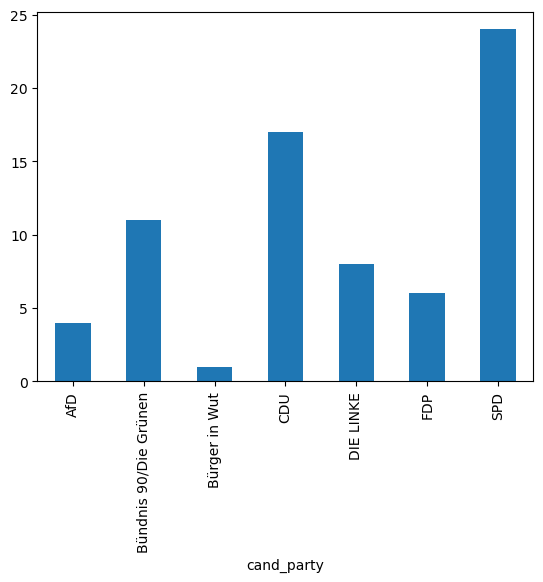

In [29]:
bremen_df[bremen_df.cand_won.notnull()].groupby(bremen_df.cand_party).size().plot(kind = 'bar')